## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Acquire Data

In [2]:
# Read the churn dataset into a dataframe as variable df.
df = pd.read_csv('churn_clean.csv')
df = pd.DataFrame(df)
# Quick look at the data.
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

## Gather insight

In [3]:
# Print information about the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Print statistical description of columns in the dataset. 
print(df.describe(include='all'))

          CaseOrder Customer_id                           Interaction  \
count   10000.00000       10000                                 10000   
unique          NaN       10000                                 10000   
top             NaN     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
freq            NaN           1                                     1   
mean     5000.50000         NaN                                   NaN   
std      2886.89568         NaN                                   NaN   
min         1.00000         NaN                                   NaN   
25%      2500.75000         NaN                                   NaN   
50%      5000.50000         NaN                                   NaN   
75%      7500.25000         NaN                                   NaN   
max     10000.00000         NaN                                   NaN   

                                     UID     City  State      County  \
count                              10000    10000  

In [5]:
# Print the data type of each column.
print(df.dtypes)

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [6]:
# Print the sum of mising values in each column.
print(df.isnull().sum())

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [7]:
# Print the percentage of missing values for each column.
print(df.isnull().sum() / len(df) * 100)

CaseOrder               0.0
Customer_id             0.0
Interaction             0.0
UID                     0.0
City                    0.0
State                   0.0
County                  0.0
Zip                     0.0
Lat                     0.0
Lng                     0.0
Population              0.0
Area                    0.0
TimeZone                0.0
Job                     0.0
Children                0.0
Age                     0.0
Income                  0.0
Marital                 0.0
Gender                  0.0
Churn                   0.0
Outage_sec_perweek      0.0
Email                   0.0
Contacts                0.0
Yearly_equip_failure    0.0
Techie                  0.0
Contract                0.0
Port_modem              0.0
Tablet                  0.0
InternetService         0.0
Phone                   0.0
Multiple                0.0
OnlineSecurity          0.0
OnlineBackup            0.0
DeviceProtection        0.0
TechSupport             0.0
StreamingTV         

In [8]:
# Print the sum of duplicates in each column. 
print(df.duplicated().sum())

0


In [9]:
# Print unique values for categorical columns.
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Customer_id: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Unique values in Interaction: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
Unique values in UID: ['e885b299883d4f9fb18e39c75155d990' 'f2de8bef964785f41a2959829830fb8a'
 'f1784cfa9f6d92ae816197eb175d3c71' ... '9c41f212d1e04dca84445019bbc9b41c'
 '3e1f269b40c235a1038863ecf6b7a0df' '0ea683a03a3cd544aefe8388aab16176']
Unique values in City: ['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
Unique values in State: ['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 

## Data Cleaning

In [10]:
# Create variable to hold dtype changes
data_type_corrections = {  
    'Item1': 'str',
    'Item2': 'str',
    'Item3': 'str',
    'Item4': 'str',
    'Item5': 'str',
    'Item6': 'str',
    'Item7': 'str',
    'Item8': 'str',
    'CaseOrder':'str',
    'Zip':'str',
    
   
}

# Change data types
for column, dtype in data_type_corrections.items():
    df[column] = df[column].astype(dtype)
    


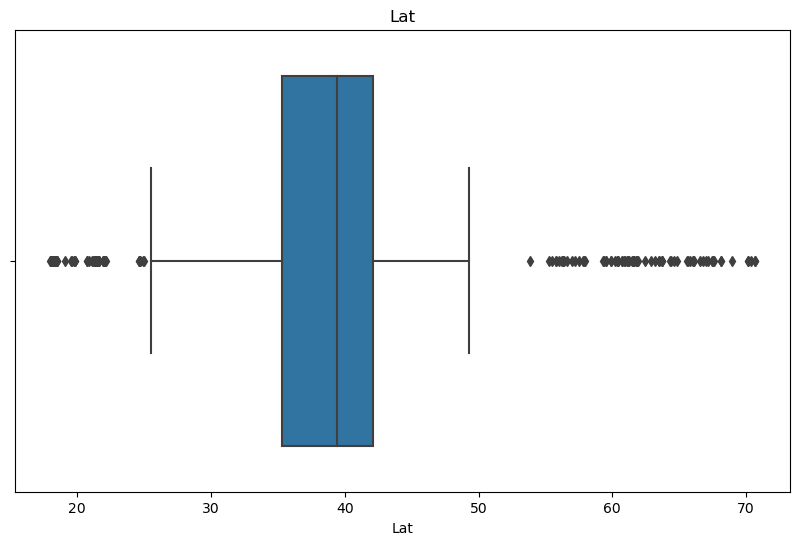

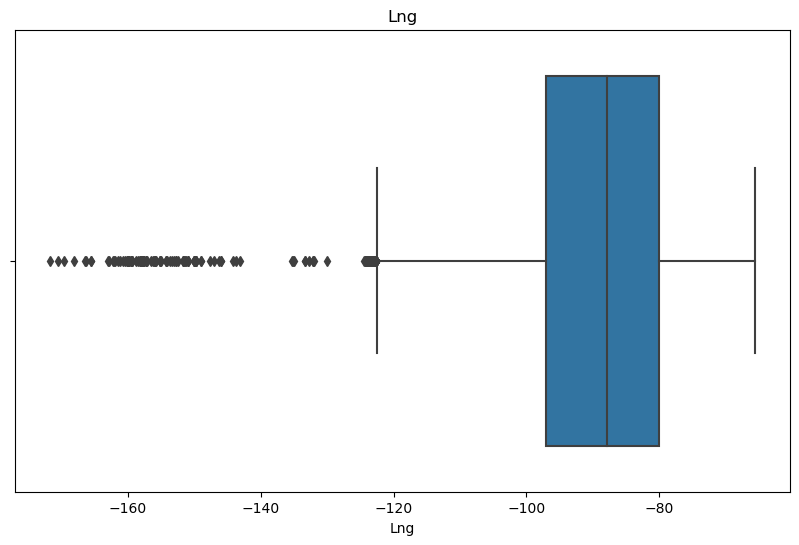

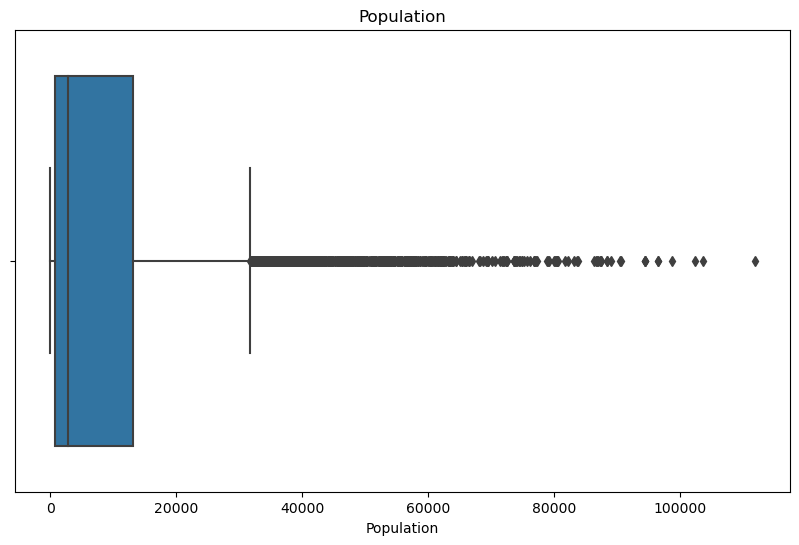

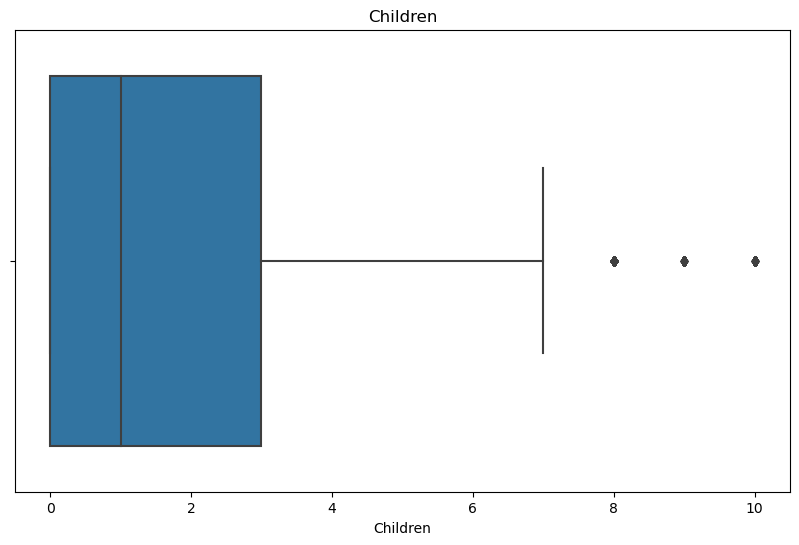

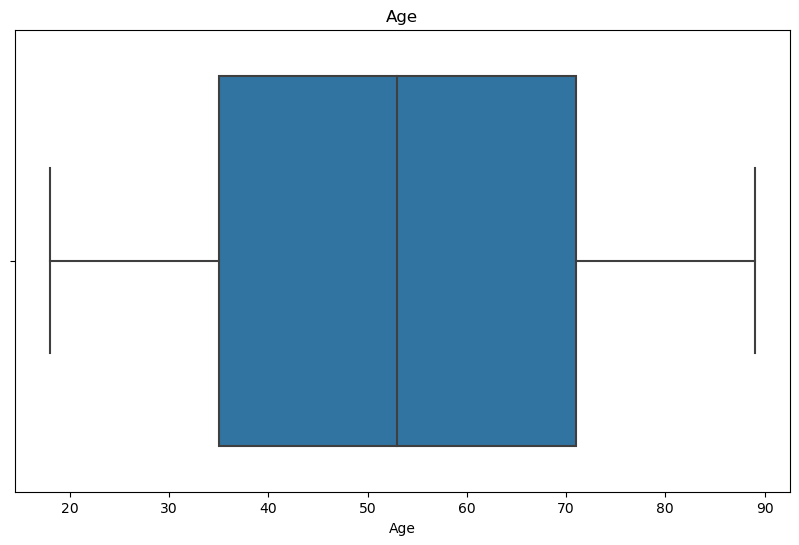

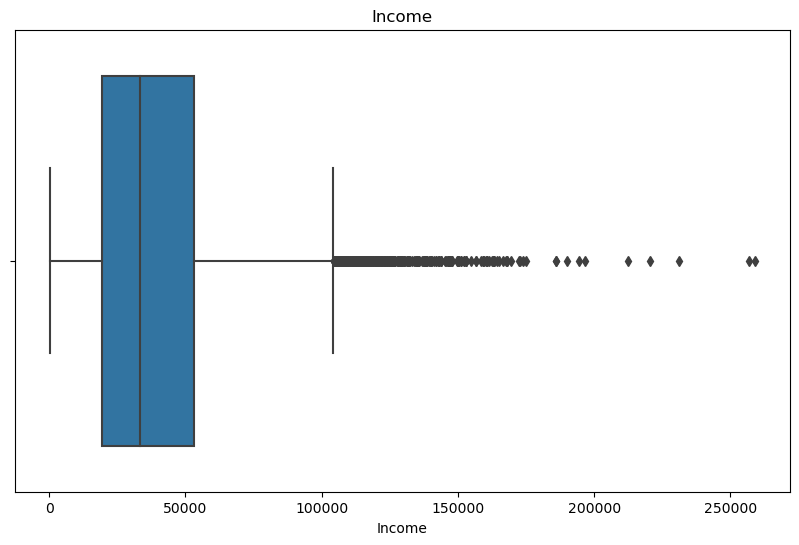

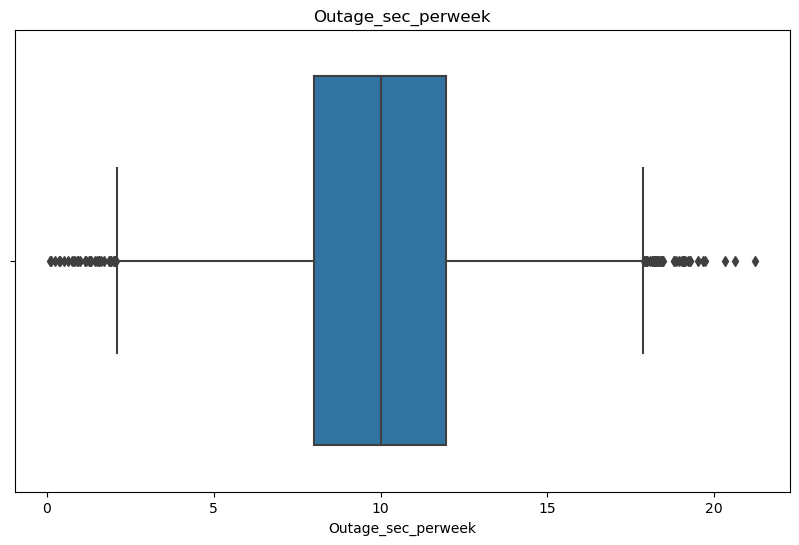

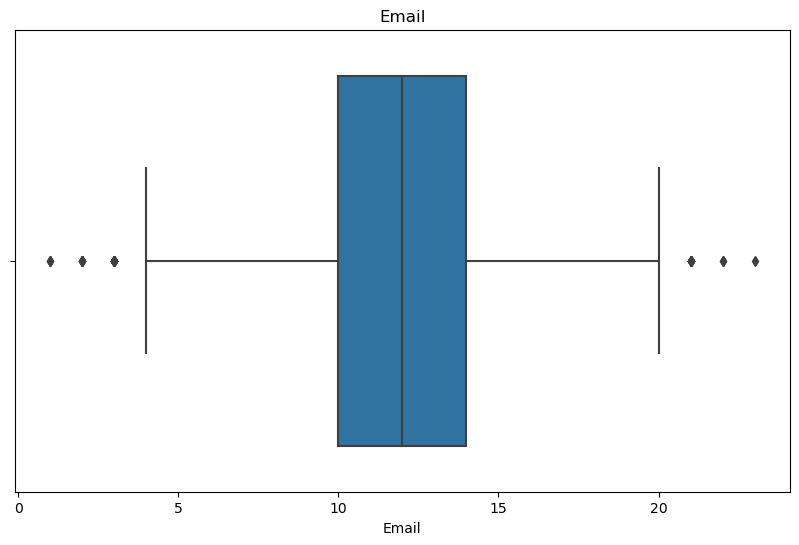

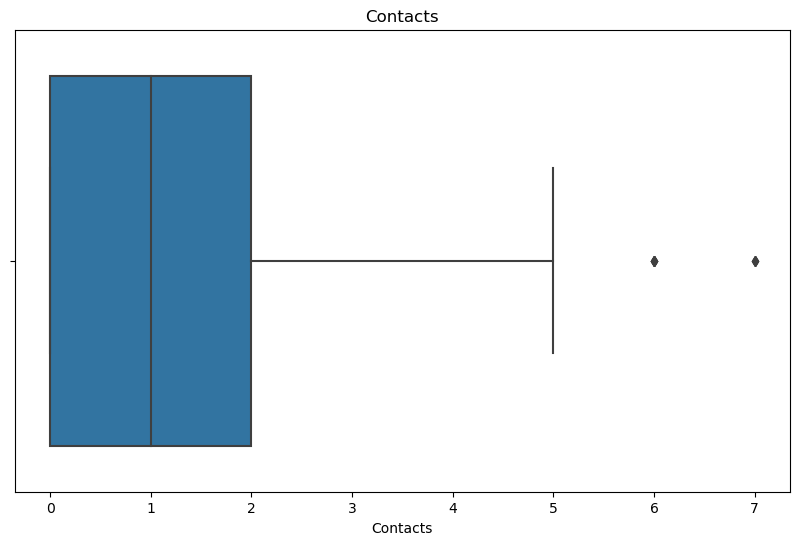

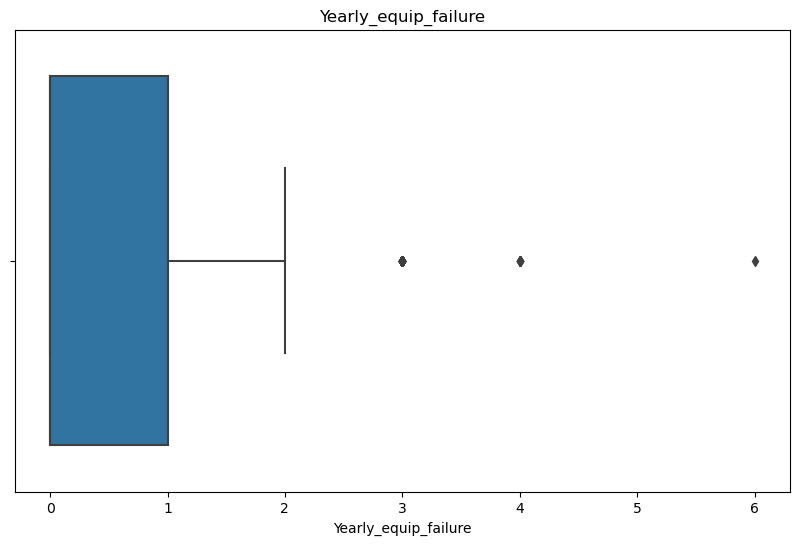

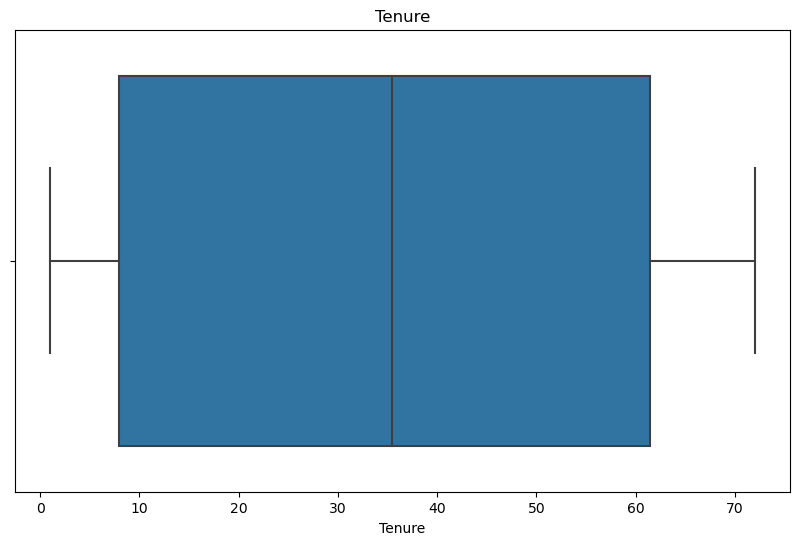

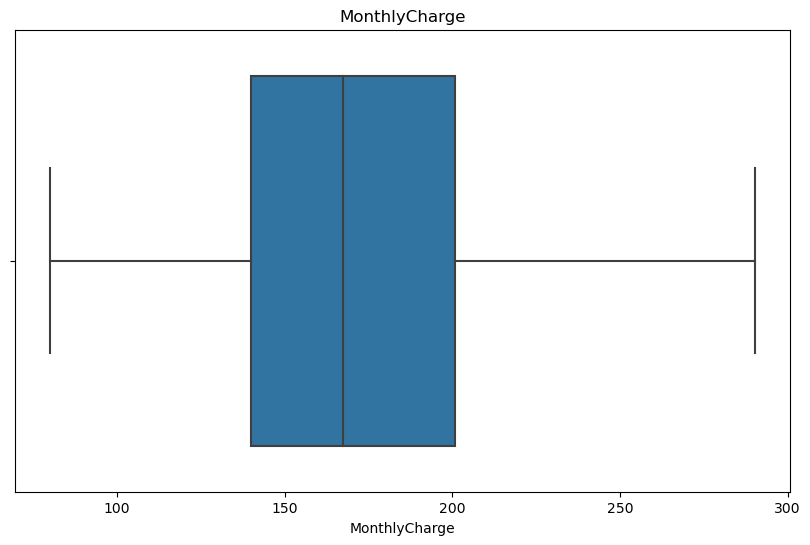

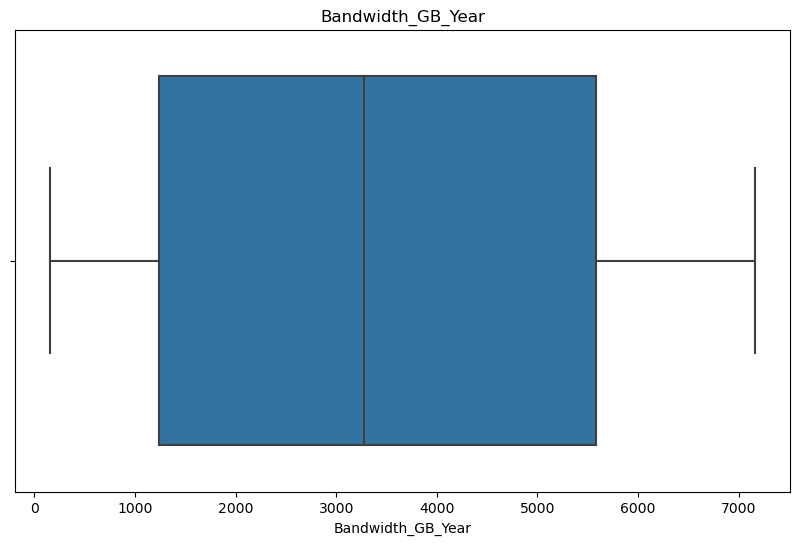

In [11]:
# Create boxplots to visualize outliers in columns.
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

In [12]:
# Renaming item columns.
rename_columns = {
    'Item1': 'Timely response',
    'Item2': 'Timely fixes',
    'Item3': 'Timely replacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectful response',
    'Item7': 'Courteous exchange',
    'Item8': 'Evidence of active listening'
}

df.rename(columns=rename_columns, inplace=True)


# Function to replace outliers with the median.
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the median value.
    median_value = df[column].median()
    
    # Replace outliers with median.
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])


# Apply the function to all numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    replace_outliers(df, col)

In [13]:
# Round numerical values 
df = df.round(2)

# Final look before saving to csv.
df.head()

CaseOrder Customer_id                           Interaction  \
0         1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1         2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2         3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3         4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4         5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip    Lat     Lng  ...  MonthlyCharge Bandwidth_GB_Year Timely response  \
0  99927  39.40  -87.92  ...         172.46            904.54               5   
1  48661  44.33  -84.24  ...         242.63            800.98               3   
2  97148  45.36  -87.92  ...         159.95           2054.71               4   
3  92014  32.97 -117.25  ...         119.96           2164.58               4   
4  77461  29.38  -95.81  ...         149.95            271.49               4   

  Timely fixes  Timely replacements  Reliability  Options Respectful response  \
0            5                    5            3        4                   4   
1            4                    3            3        4                   3   
2            4                    2            4        4                   3   
3            4                    4            2        5                   4   
4            4                    4            3        4                   4   

  Courteous exchange Evidence of active listening  
0                  3                            4  
1                  4                            4  
2                  3                            3  
3                  3                            3  
4                  4                            5  

[5 rows x 50 columns]

In [14]:
# Print statistical description of columns in the dataset. 
df[['MonthlyCharge', 'Bandwidth_GB_Year','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','InternetService','Contract']].describe()

MonthlyCharge  Bandwidth_GB_Year    Population      Children  \
count   10000.000000       10000.000000  10000.000000  10000.000000   
mean      172.624724        3392.341505   5721.033050      1.778000   
std        42.943016        2185.294958   7541.829344      1.663849   
min        79.980000         155.510000      0.000000      0.000000   
25%       139.980000        1236.470000    738.000000      0.000000   
50%       167.480000        3279.535000   2909.750000      1.000000   
75%       200.737500        5586.145000   7177.750000      3.000000   
max       290.160000        7158.980000  31795.000000      7.000000   

                Age         Income  Outage_sec_perweek         Email  \
count  10000.000000   10000.000000        10000.000000  10000.000000   
mean      53.078400   36616.113703            9.993481     12.024000   
std       20.698882   22505.746253            2.876488      2.969294   
min       18.000000     348.670000            2.090000      4.000000   
25%       35.000000   19224.717500            8.050000     10.000000   
50%       53.000000   33169.740000           10.020000     12.000000   
75%       71.000000   49864.247500           11.930000     14.000000   
max       89.000000  104166.700000           17.860000     20.000000   

           Contacts  Yearly_equip_failure        Tenure  
count  10000.000000          10000.000000  10000.000000  
mean       0.989900              0.368800     34.526188  
std        0.976572              0.578464     26.443077  
min        0.000000              0.000000      1.000000  
25%        0.000000              0.000000      7.920000  
50%        1.000000              0.000000     35.430000  
75%        2.000000              1.000000     61.480000  
max        5.000000              2.000000     72.000000

In [15]:
df[['Churn','Contract','InternetService']].describe()

Churn        Contract InternetService
count   10000           10000           10000
unique      2               3               3
top        No  Month-to-month     Fiber Optic
freq     7350            5456            4408

In [16]:
# Create a variable for the cleaned data and save file to csv. 
d208_cleaned_data = 'd208_logistic_regression_cleaned_data.csv'
df.to_csv(d208_cleaned_data, index=False)



## PCA

In [17]:
# Separate numeric and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Select only numerical columns for PCA
numerical_data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the loading matrix
loading_matrix = pd.DataFrame(pca.components_.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Loading Matrix with All Features:")
print(loading_matrix)

# Identify churn-related features
churn_related_features = [col for col in df.columns if 'Churn' in col.lower()]

# Check if churn-related features are correctly identified
print("Churn-related features: ", churn_related_features)

if churn_related_features:
    # Extract the loadings for churn-related features
    churn_loadings = loading_matrix.loc[churn_related_features]

    # Identify the principal components related to churn by checking high loadings
    # Threshold set at 5 to select significant components
    significant_components = churn_loadings.abs().mean().nlargest(5).index

    # Display the identified principal components related to churn
    print("Principal Components related to Churn:")
    print(significant_components)
else:
    print("No churn-related features found.")

Loading Matrix with All Features:
                           PC1       PC2       PC3       PC4       PC5  \
Lat                  -0.017572 -0.668637  0.273527 -0.177743 -0.053411   
Lng                  -0.001186 -0.040173  0.722947  0.078146 -0.374725   
Population           -0.000518  0.648281  0.264959  0.190986 -0.124189   
Children              0.010142 -0.132192  0.154760  0.555572 -0.013537   
Age                   0.001896  0.097168  0.129208 -0.304414  0.044722   
Income               -0.002463 -0.238801  0.030070  0.018026 -0.109508   
Outage_sec_perweek    0.012023  0.030468  0.351245 -0.013261  0.514158   
Email                -0.017227  0.142074 -0.106220 -0.383663 -0.238207   
Contacts              0.002640  0.088578  0.183845 -0.529111  0.327149   
Yearly_equip_failure  0.011503 -0.080766 -0.085659  0.305659  0.558571   
Tenure                0.705455 -0.009502 -0.020856 -0.018866 -0.031037   
MonthlyCharge         0.040870  0.107048  0.338453 -0.055263  0.293026   
Band

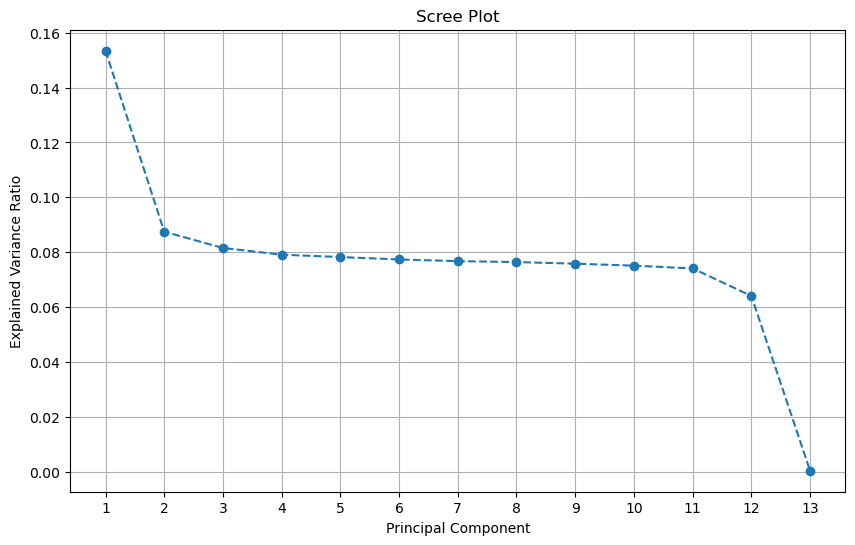

In [18]:
# Explained varience scree plot
explained_variance = pca.explained_variance_ratio_

#Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()


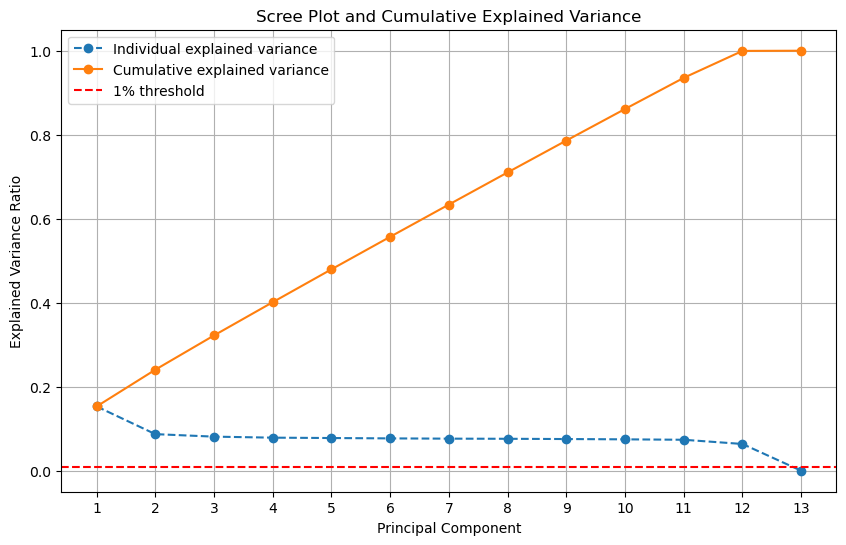

Explained variance ratio for each component:
PC1: 0.1534
PC2: 0.0875
PC3: 0.0816
PC4: 0.0791
PC5: 0.0783
PC6: 0.0774
PC7: 0.0768
PC8: 0.0764
PC9: 0.0758
PC10: 0.0751
PC11: 0.0741
PC12: 0.0641
PC13: 0.0004

Cumulative explained variance ratio:
PC1: 0.1534
PC2: 0.2409
PC3: 0.3225
PC4: 0.4016
PC5: 0.4798
PC6: 0.5572
PC7: 0.6340
PC8: 0.7104
PC9: 0.7862
PC10: 0.8613
PC11: 0.9355
PC12: 0.9996
PC13: 1.0000


In [19]:
# Take a look at cumulative and individual explained variance
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Scree plot with cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.axhline(y=0.01, color='r', linestyle='--', label='1% threshold')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

# Print explained variance for each component
print("Explained variance ratio for each component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

# Print cumulative explained variance
print("\nCumulative explained variance ratio:")
for i, cumulative_variance in enumerate(cumulative_explained_variance, start=1):
    print(f"PC{i}: {cumulative_variance:.4f}")

# Data Exploration

# Univariate Visualizations / Statistics

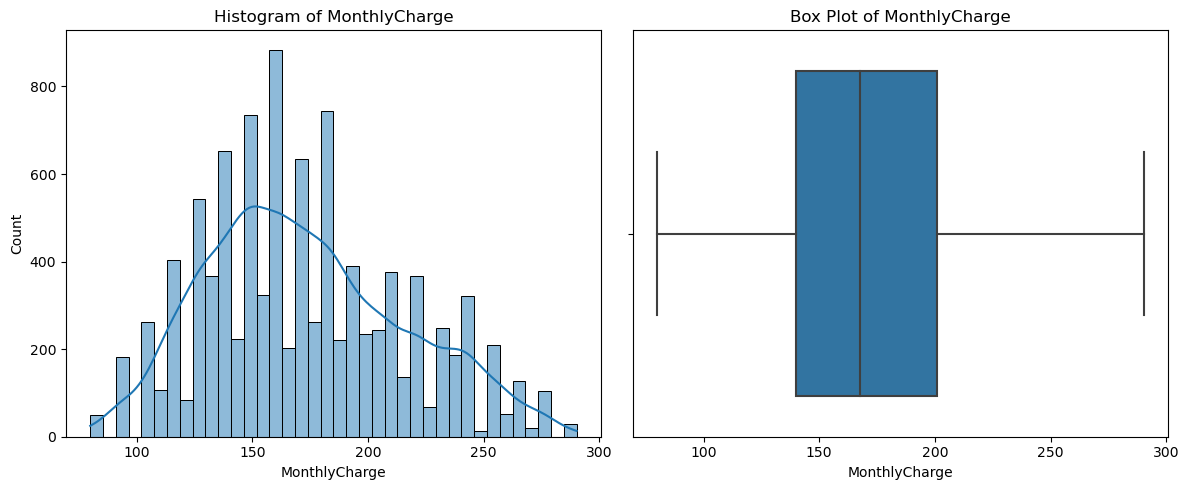

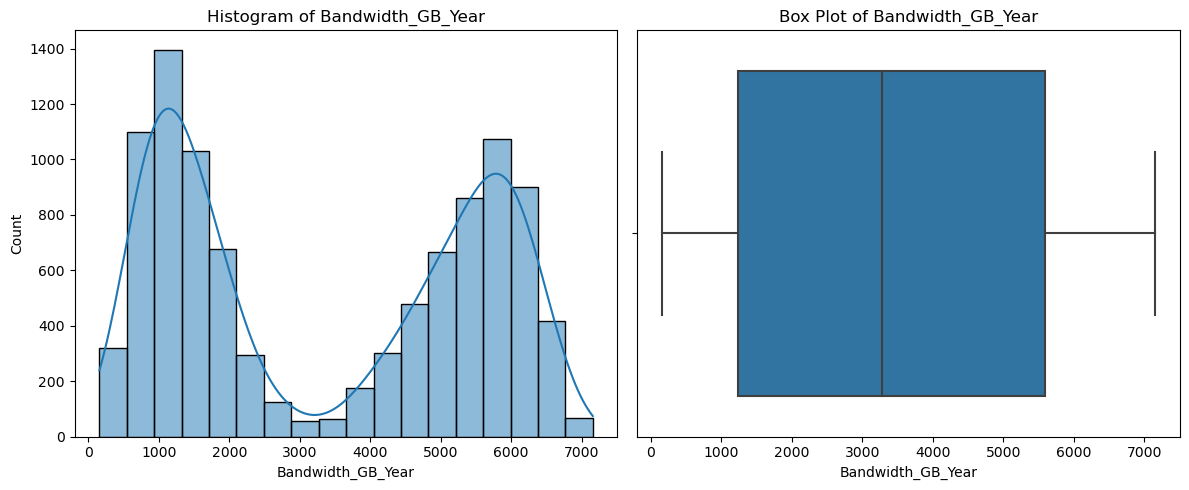

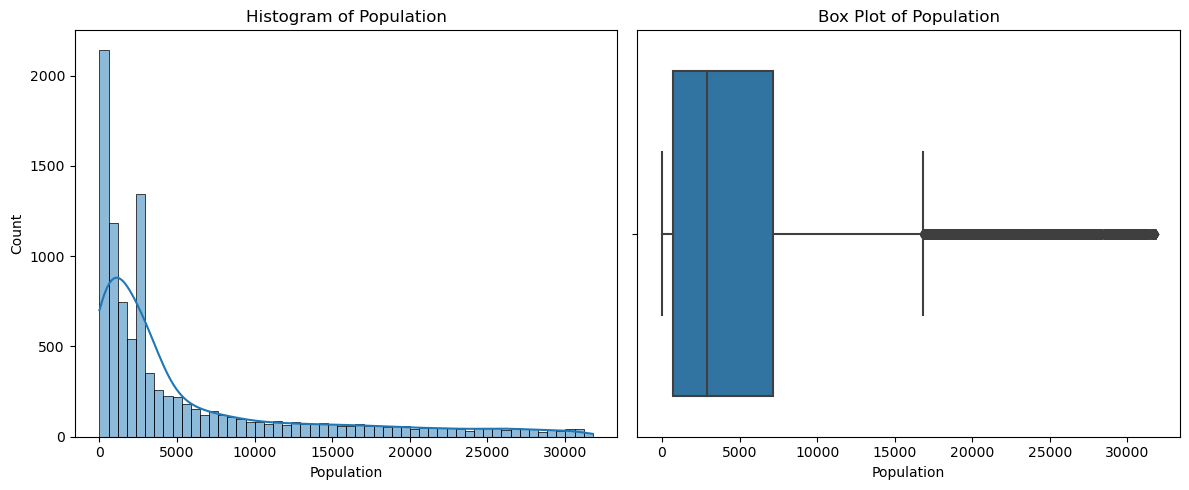

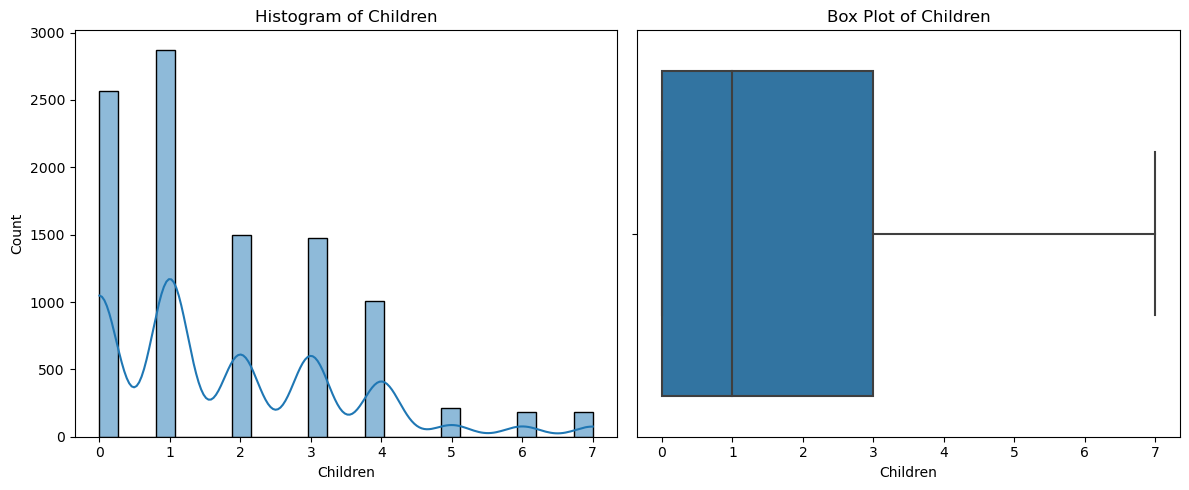

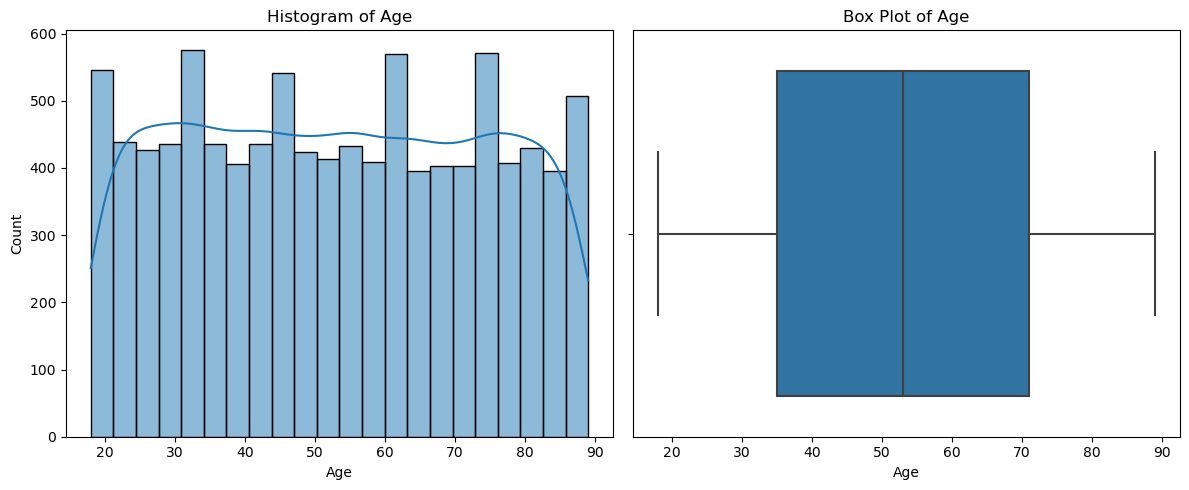

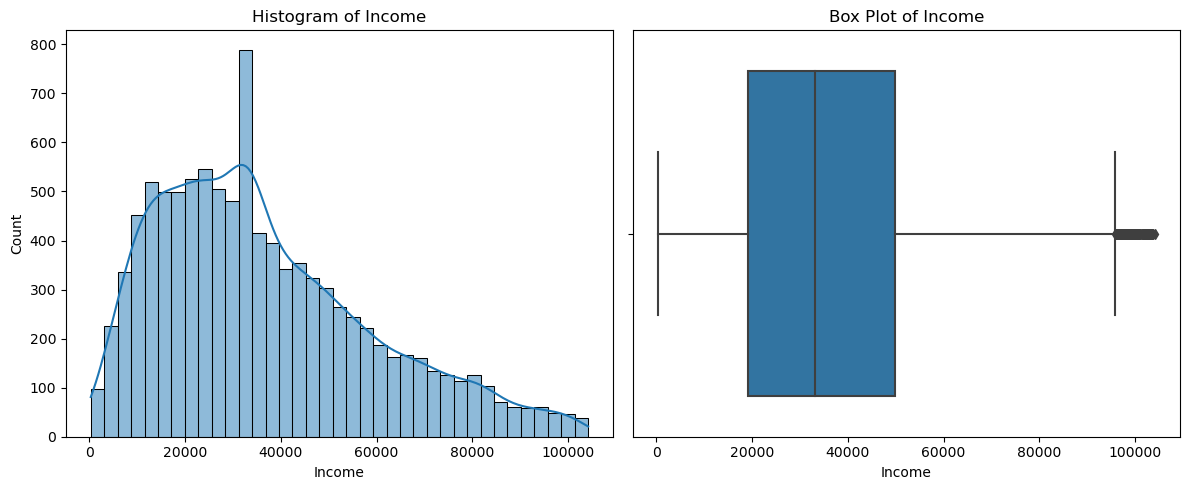

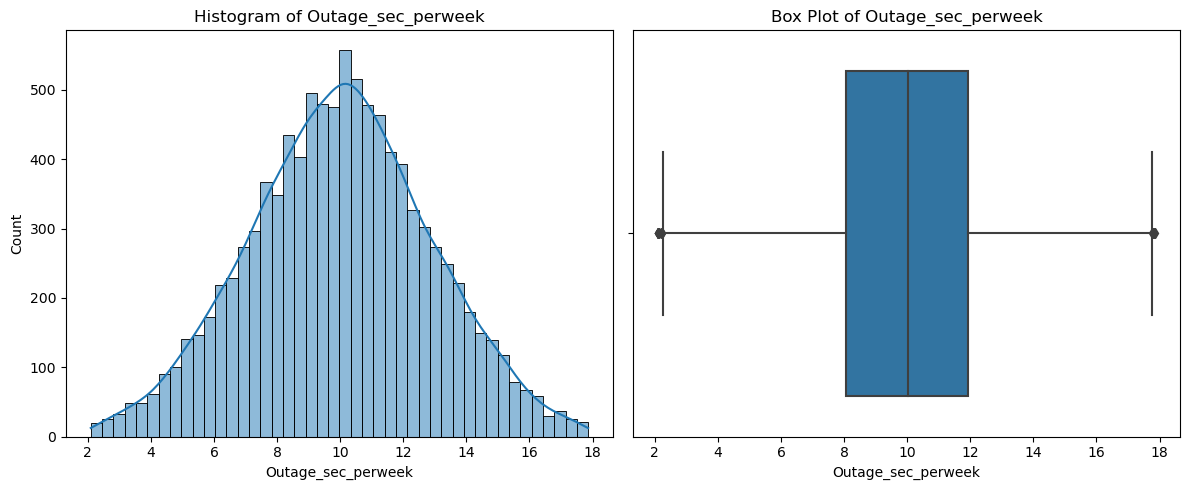

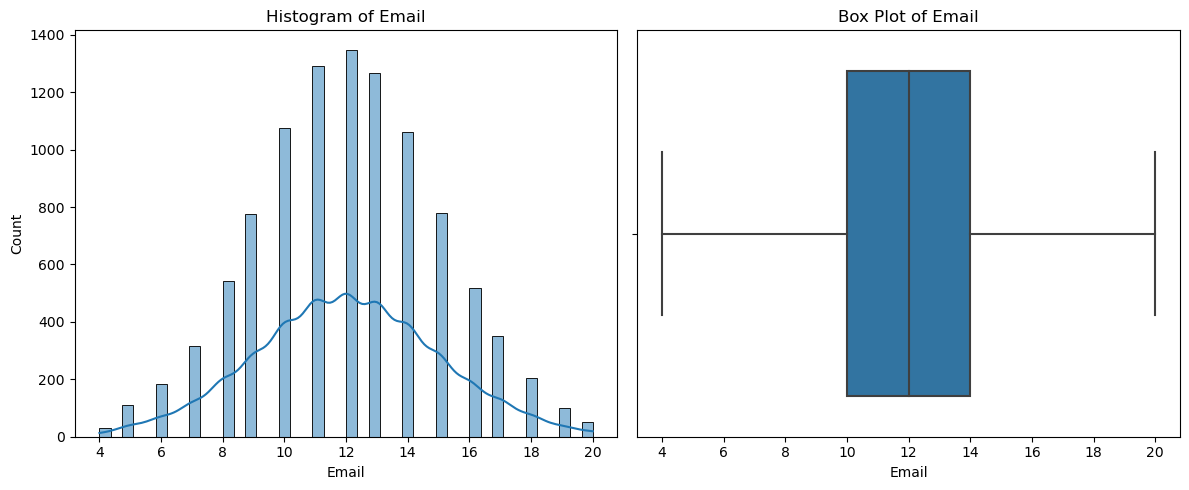

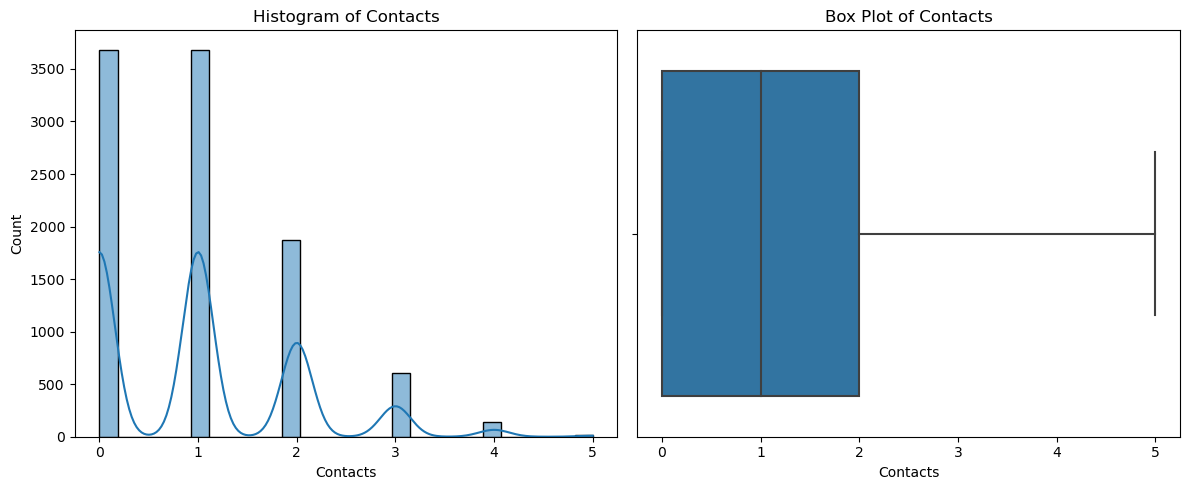

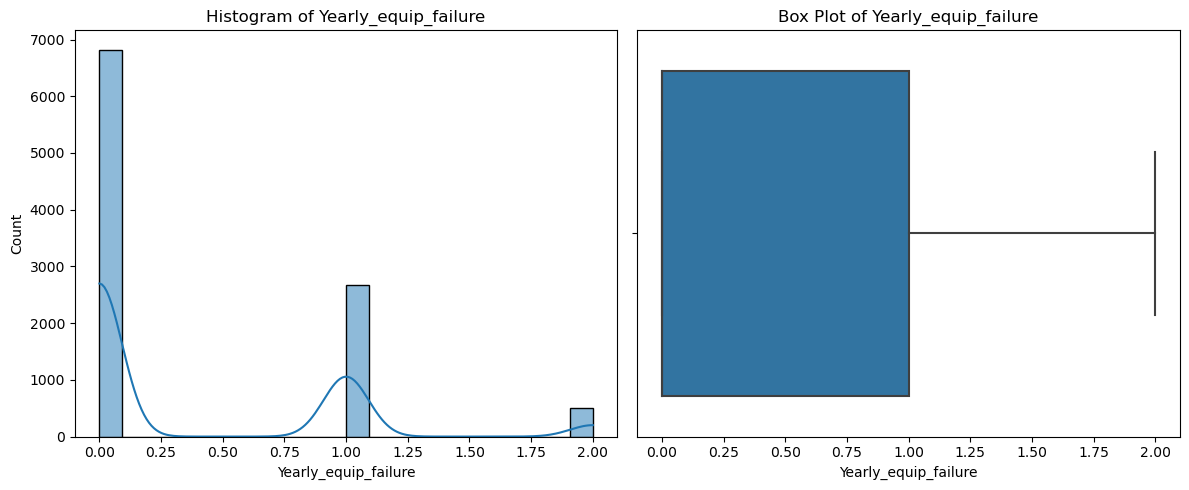

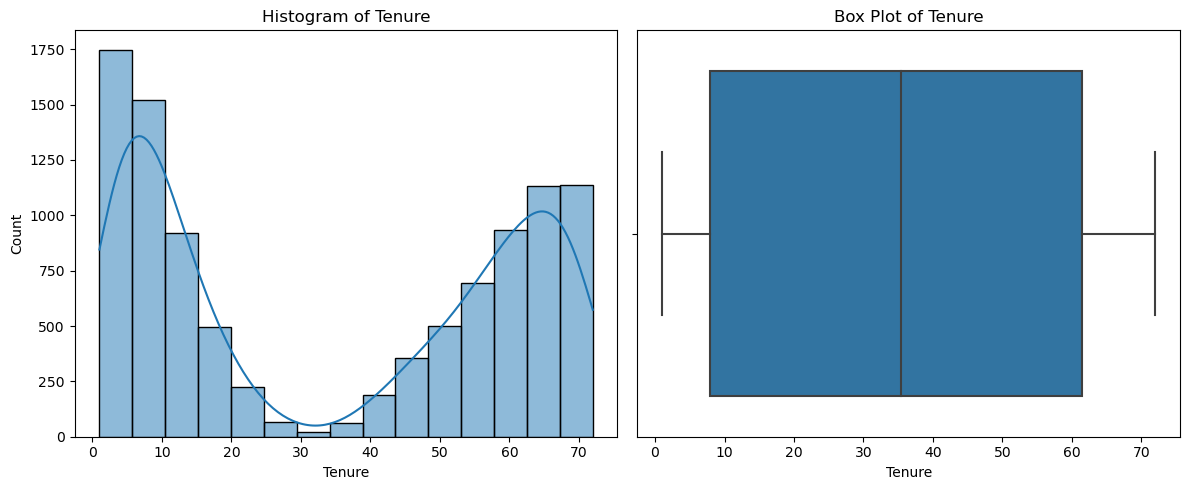

In [20]:
# Univariate statistics for numerical variables
numerical_vars = ['MonthlyCharge', 'Bandwidth_GB_Year','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure']
numerical_stats = df[numerical_vars].describe().T

numerical_stats['skew'] = df[numerical_vars].skew()
numerical_stats['kurtosis'] = df[numerical_vars].kurtosis()

# Visualize numerical variables
for var in numerical_vars:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    
    plt.tight_layout()
    plt.show()


In [21]:
# Display univariate statistics for numerical variables
print("Univariate Statistics for Numerical Variables:")
print(numerical_stats)

Univariate Statistics for Numerical Variables:
                        count          mean           std     min         25%  \
MonthlyCharge         10000.0    172.624724     42.943016   79.98    139.9800   
Bandwidth_GB_Year     10000.0   3392.341505   2185.294958  155.51   1236.4700   
Population            10000.0   5721.033050   7541.829344    0.00    738.0000   
Children              10000.0      1.778000      1.663849    0.00      0.0000   
Age                   10000.0     53.078400     20.698882   18.00     35.0000   
Income                10000.0  36616.113703  22505.746253  348.67  19224.7175   
Outage_sec_perweek    10000.0      9.993481      2.876488    2.09      8.0500   
Email                 10000.0     12.024000      2.969294    4.00     10.0000   
Contacts              10000.0      0.989900      0.976572    0.00      0.0000   
Yearly_equip_failure  10000.0      0.368800      0.578464    0.00      0.0000   
Tenure                10000.0     34.526188     26.443077    1

In [22]:
# Select the specified categorical variables
categorical_features = ['Contract','InternetService','Churn']
# Generate univariate statistics for these variables
univariate_stats_selected = df[categorical_features].describe(include='all').transpose()

# Display the univariate statistics
print(univariate_stats_selected)

                 count unique             top  freq
Contract         10000      3  Month-to-month  5456
InternetService  10000      3     Fiber Optic  4408
Churn            10000      2              No  7350


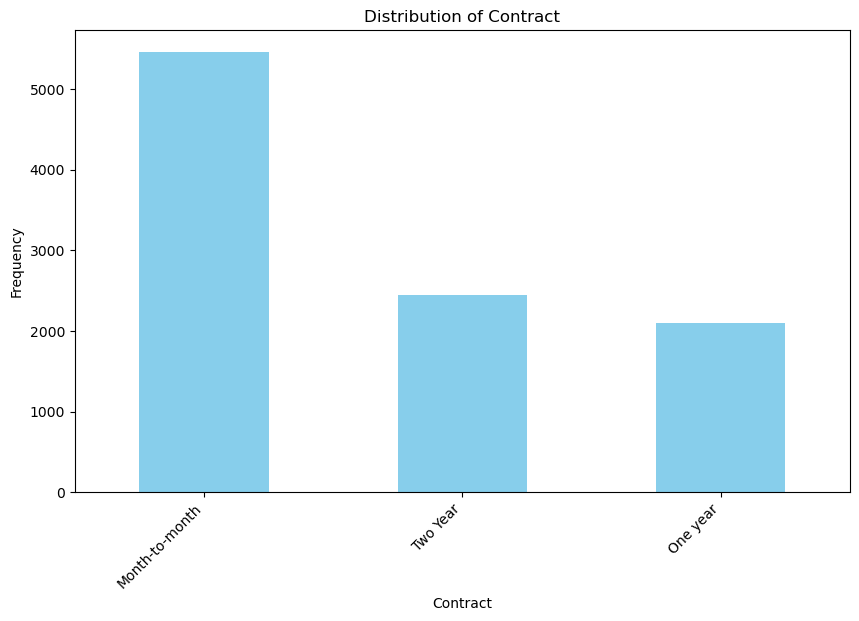


Frequency distribution for Contract:

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64 



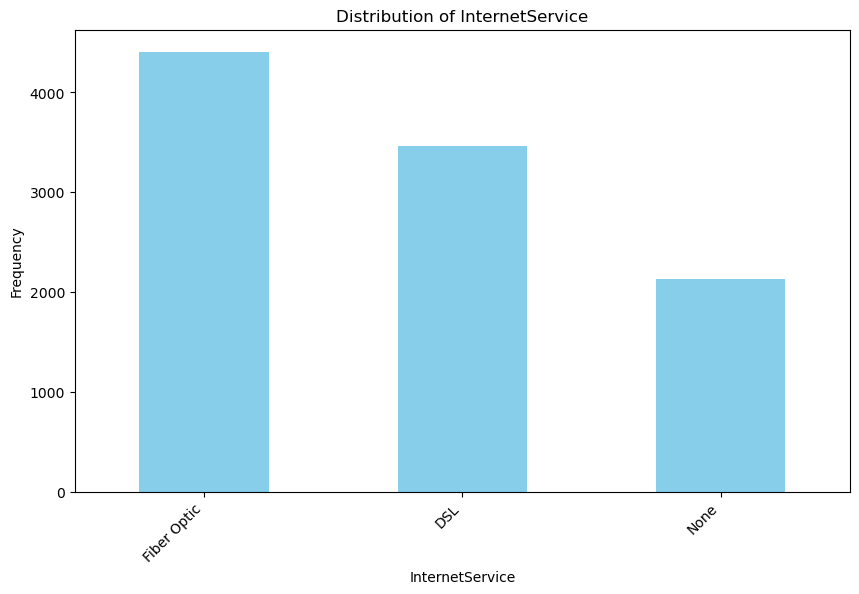


Frequency distribution for InternetService:

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64 



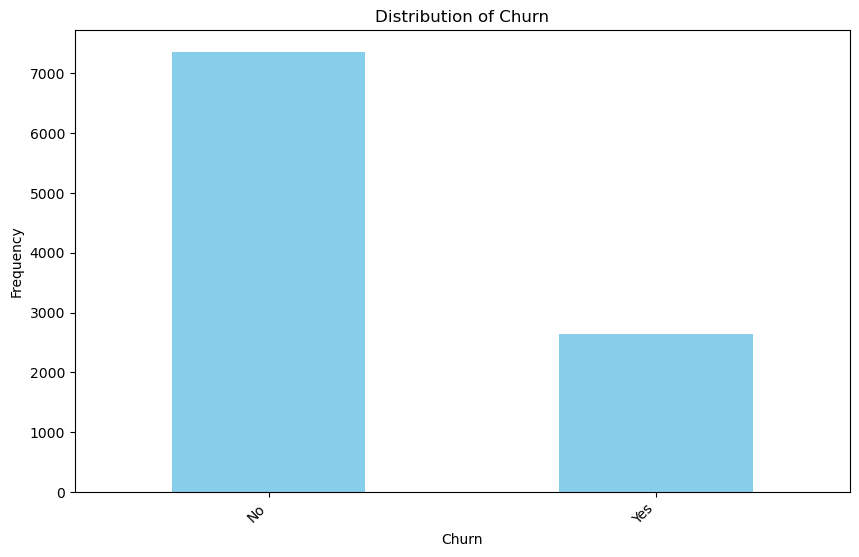


Frequency distribution for Churn:

No     7350
Yes    2650
Name: Churn, dtype: int64 



In [23]:
# Categorical features to analyze
categorical_features = ['Contract','InternetService','Churn']

# Function to plot univariate statistics for categorical features
def plot_categorical_features(data, categorical_features):
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        data[feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        print(f"\nFrequency distribution for {feature}:\n")
        print(data[feature].value_counts(), "\n")

# Display univariate statistics and visuals for the categorical features
plot_categorical_features(df, categorical_features)

# Bivariate Visualizations / Statistics

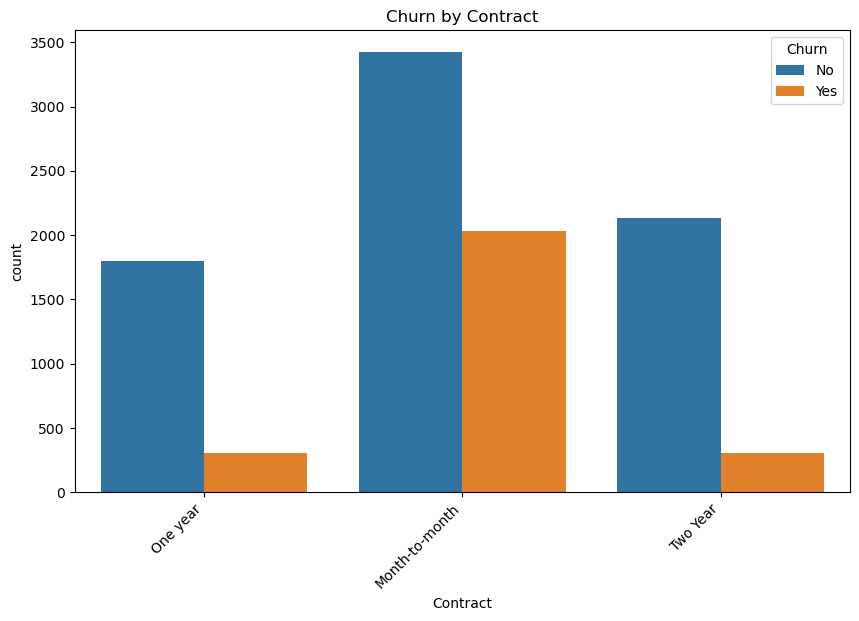


 Churn by Contract:

Contract        Churn
Month-to-month  No       0.627199
                Yes      0.372801
One year        No       0.853949
                Yes      0.146051
Two Year        No       0.873464
                Yes      0.126536
Name: Churn, dtype: float64 



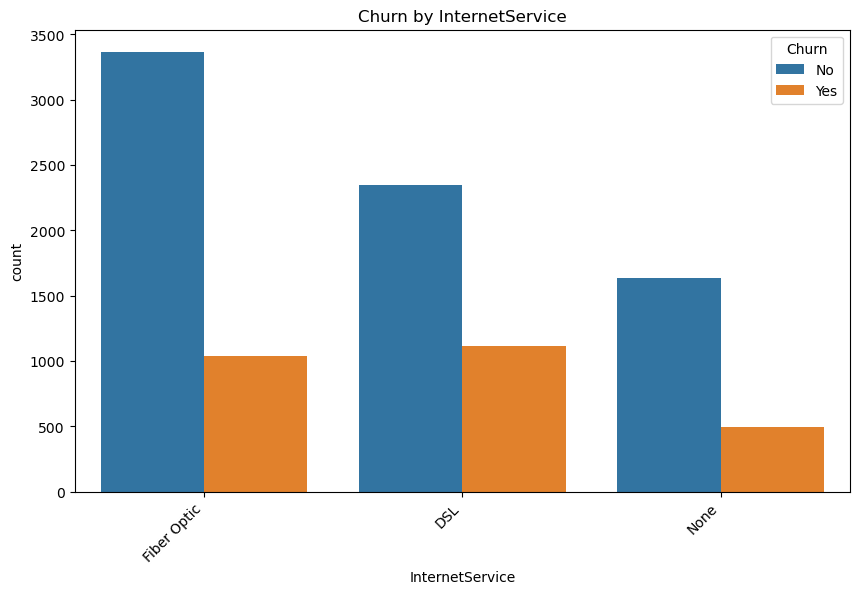


 Churn by InternetService:

InternetService  Churn
DSL              No       0.678314
                 Yes      0.321686
Fiber Optic      No       0.764065
                 Yes      0.235935
None             No       0.767027
                 Yes      0.232973
Name: Churn, dtype: float64 



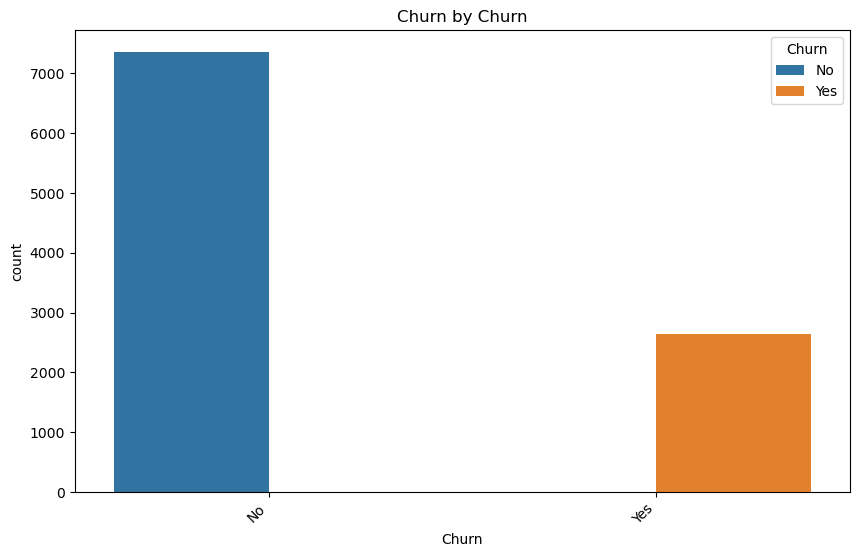


 Churn by Churn:

Churn  Churn
No     No       1.0
Yes    Yes      1.0
Name: Churn, dtype: float64 



In [24]:
# Categorical vs. Churn

# Loop through each categorical feature and plot
for cat_feature in categorical_features:
    plt.figure(figsize=(10, 6))
    
    # Use a countplot or barplot instead of boxplot for categorical vs. categorical relationships
    sns.countplot(x=cat_feature, hue='Churn', data=df)
    
    plt.title(f'Churn by {cat_feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    print(f"\n Churn by {cat_feature}:\n")
    print(df.groupby(cat_feature)['Churn'].value_counts(normalize=True), "\n")


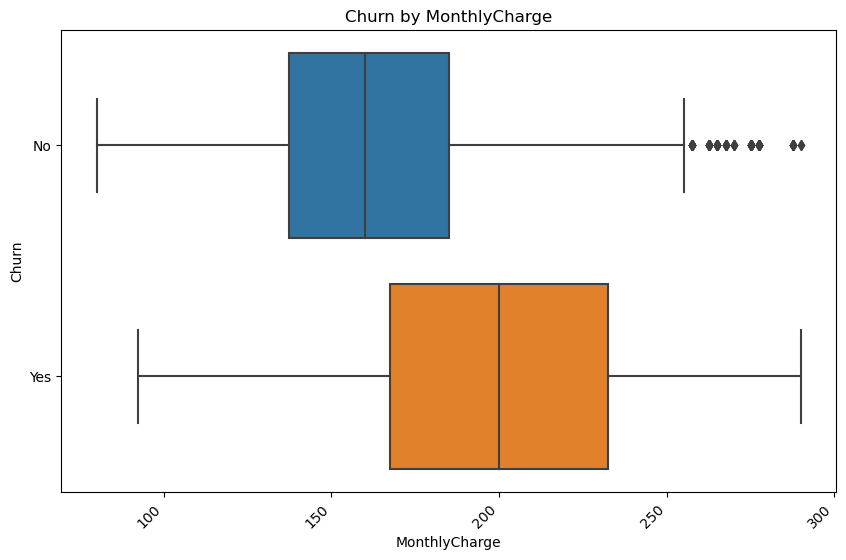


 Churn by MonthlyCharge:

              count unique  top freq
MonthlyCharge                       
79.98            36      1   No   36
82.50            13      1   No   13
92.46            74      2   No   69
92.49            24      1   No   24
92.50            28      2   No   27
...             ...    ...  ...  ...
275.13           40      2  Yes   23
277.64           19      2  Yes   11
277.65           22      2  Yes   13
287.64           24      2  Yes   15
290.16            5      2  Yes    3

[285 rows x 4 columns] 



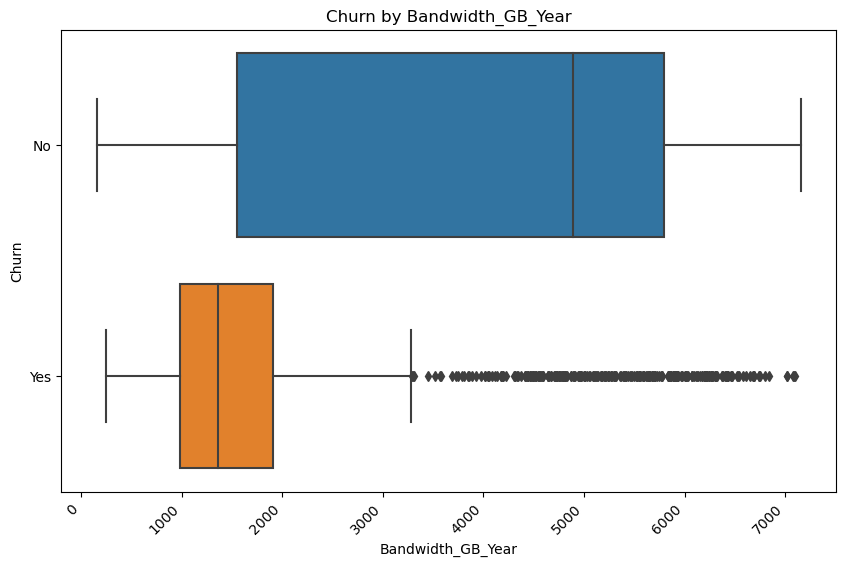


 Churn by Bandwidth_GB_Year:

                  count unique  top freq
Bandwidth_GB_Year                       
155.51                1      1   No    1
169.40                1      1   No    1
223.48                1      1   No    1
242.99                1      1   No    1
243.26                1      1   No    1
...                 ...    ...  ...  ...
7081.31               1      1  Yes    1
7084.80               1      1  Yes    1
7096.49               1      1  Yes    1
7138.31               1      1   No    1
7158.98               1      1   No    1

[9897 rows x 4 columns] 



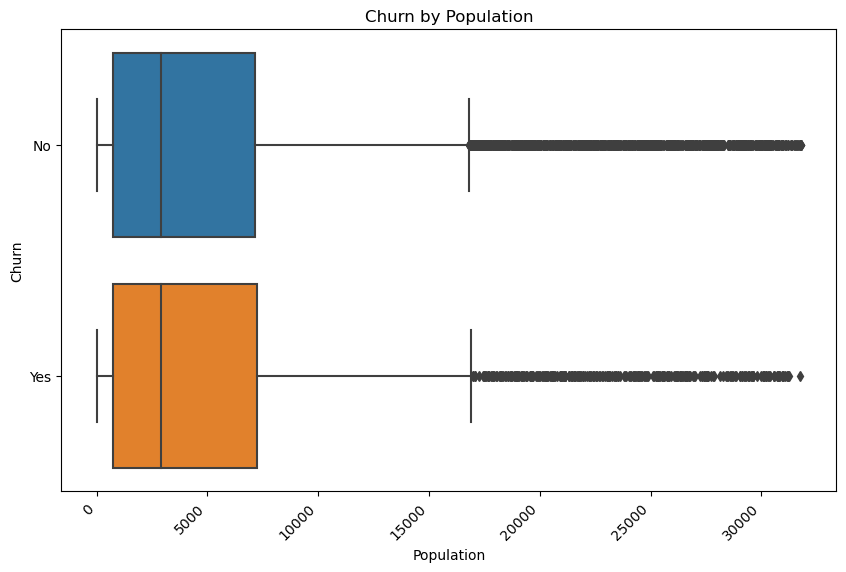


 Churn by Population:

           count unique  top freq
Population                       
0.0           97      2   No   65
2.0            1      1   No    1
4.0            3      2  Yes    2
5.0            1      1  Yes    1
6.0            6      2   No    4
...          ...    ...  ...  ...
31749.0        1      1   No    1
31758.0        1      1   No    1
31790.0        1      1   No    1
31791.0        1      1   No    1
31795.0        1      1   No    1

[5152 rows x 4 columns] 



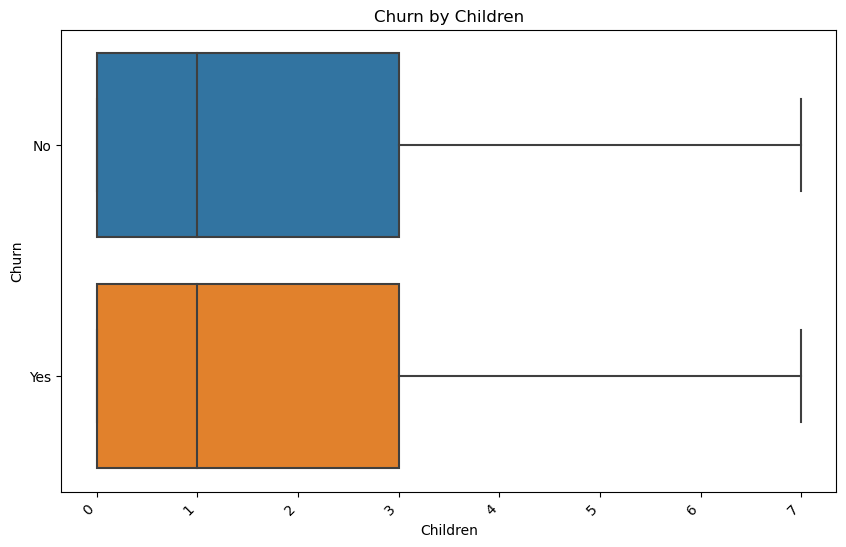


 Churn by Children:

         count unique top  freq
Children                       
0.0       2570      2  No  1888
1.0       2873      2  No  2133
2.0       1495      2  No  1099
3.0       1472      2  No  1068
4.0       1006      2  No   728
5.0        212      2  No   151
6.0        187      2  No   147
7.0        185      2  No   136 



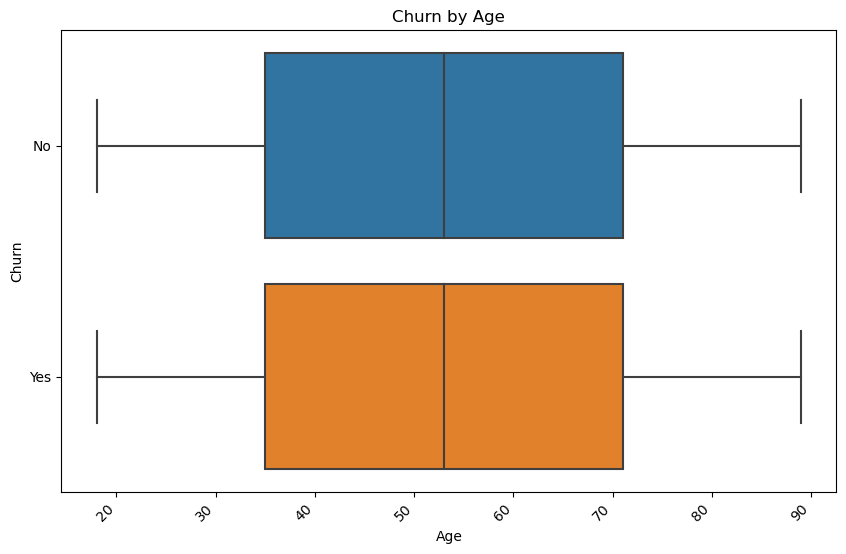


 Churn by Age:

     count unique top freq
Age                       
18.0   126      2  No   97
19.0   154      2  No  109
20.0   130      2  No   96
21.0   136      2  No   93
22.0   144      2  No  109
...    ...    ...  ..  ...
85.0   134      2  No  104
86.0   131      2  No   93
87.0   125      2  No   89
88.0   125      2  No   99
89.0   126      2  No   94

[72 rows x 4 columns] 



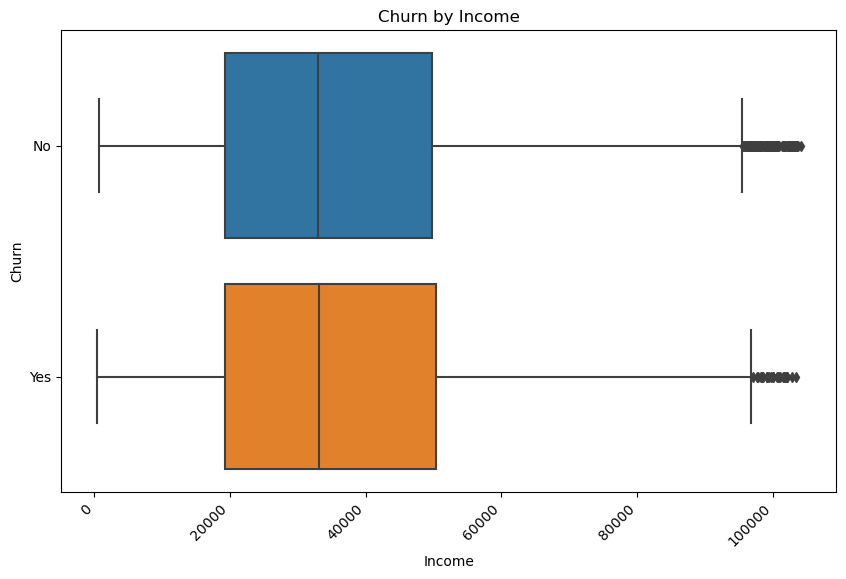


 Churn by Income:

          count unique  top freq
Income                          
348.67        1      1  Yes    1
368.50        1      1  Yes    1
630.24        1      1   No    1
643.20        1      1   No    1
644.32        1      1   No    1
...         ...    ...  ...  ...
103476.10     1      1   No    1
103499.70     1      1   No    1
103510.70     1      1   No    1
103625.10     1      1   No    1
104166.70     1      1   No    1

[9658 rows x 4 columns] 



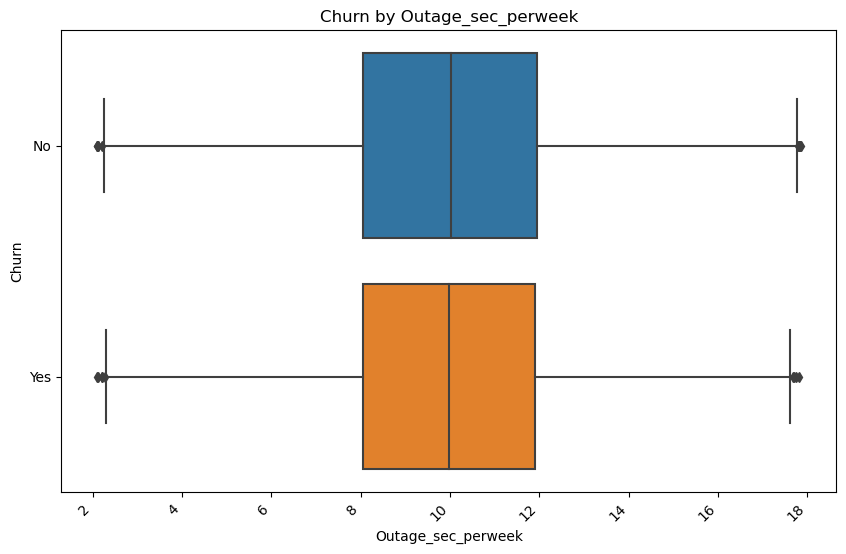


 Churn by Outage_sec_perweek:

                   count unique  top freq
Outage_sec_perweek                       
2.09                   1      1   No    1
2.10                   2      2  Yes    1
2.11                   2      2  Yes    1
2.12                   1      1   No    1
2.20                   1      1  Yes    1
...                  ...    ...  ...  ...
17.80                  1      1   No    1
17.81                  1      1   No    1
17.82                  2      2  Yes    1
17.83                  2      1   No    2
17.86                  1      1   No    1

[1400 rows x 4 columns] 



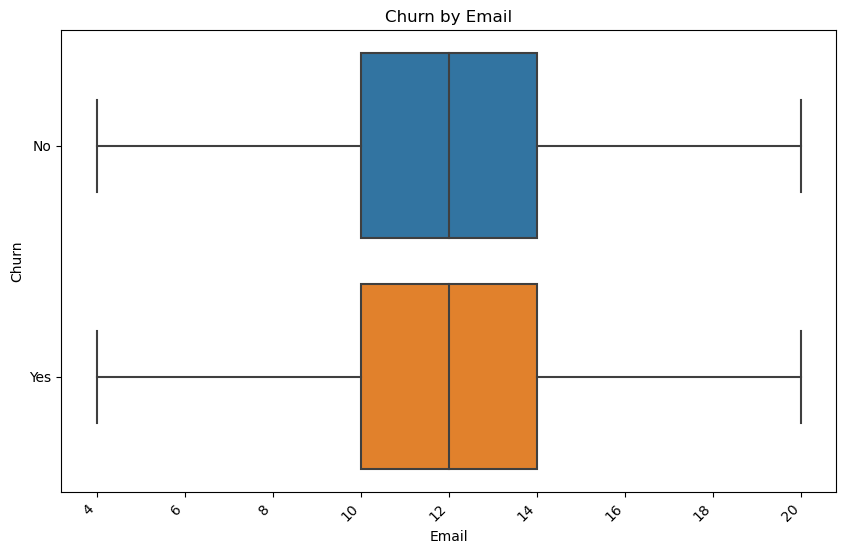


 Churn by Email:

      count unique top freq
Email                      
4.0      31      2  No   26
5.0     109      2  No   79
6.0     185      2  No  138
7.0     316      2  No  230
8.0     543      2  No  409
9.0     774      2  No  578
10.0   1074      2  No  796
11.0   1291      2  No  971
12.0   1348      2  No  978
13.0   1268      2  No  910
14.0   1060      2  No  768
15.0    779      2  No  564
16.0    517      2  No  383
17.0    351      2  No  262
18.0    203      2  No  150
19.0    100      2  No   67
20.0     51      2  No   41 



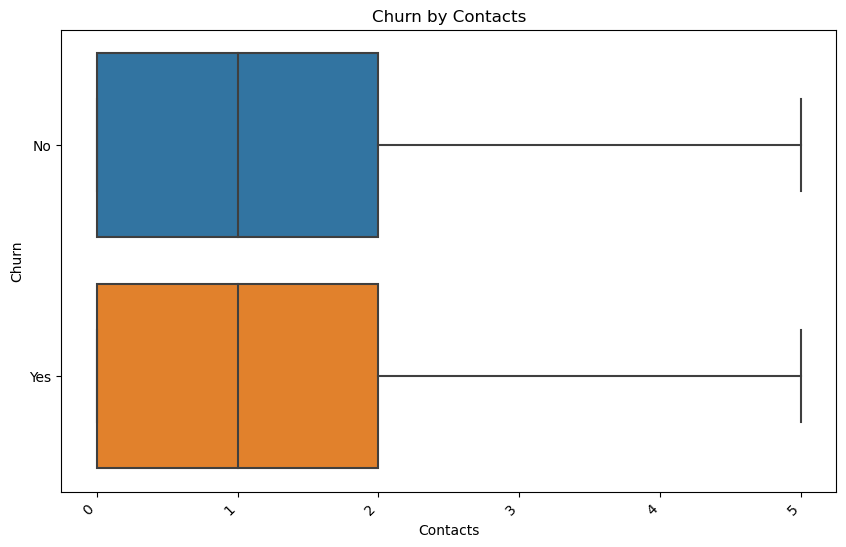


 Churn by Contacts:

         count unique top  freq
Contacts                       
0.0       3680      2  No  2728
1.0       3683      2  No  2694
2.0       1872      2  No  1369
3.0        608      2  No   444
4.0        137      2  No   100
5.0         20      2  No    15 



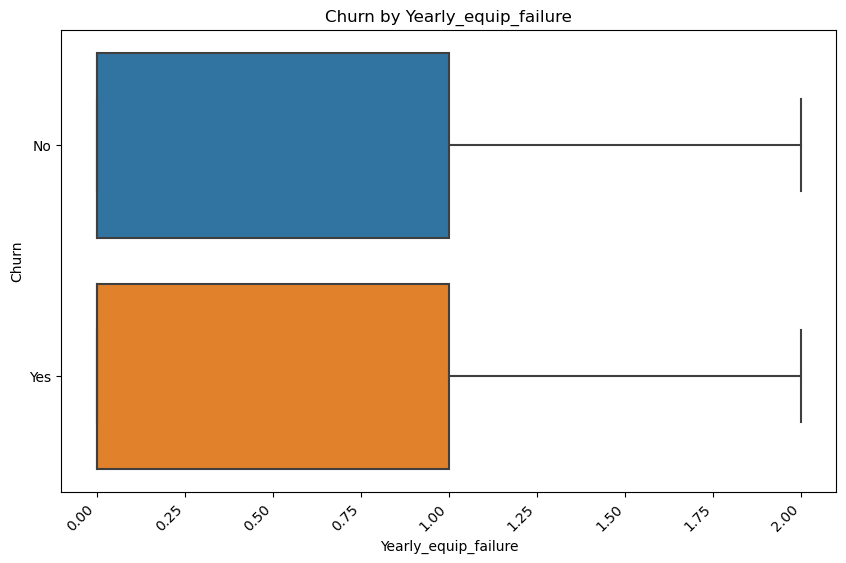


 Churn by Yearly_equip_failure:

                     count unique top  freq
Yearly_equip_failure                       
0.0                   6821      2  No  5006
1.0                   2670      2  No  1953
2.0                    509      2  No   391 



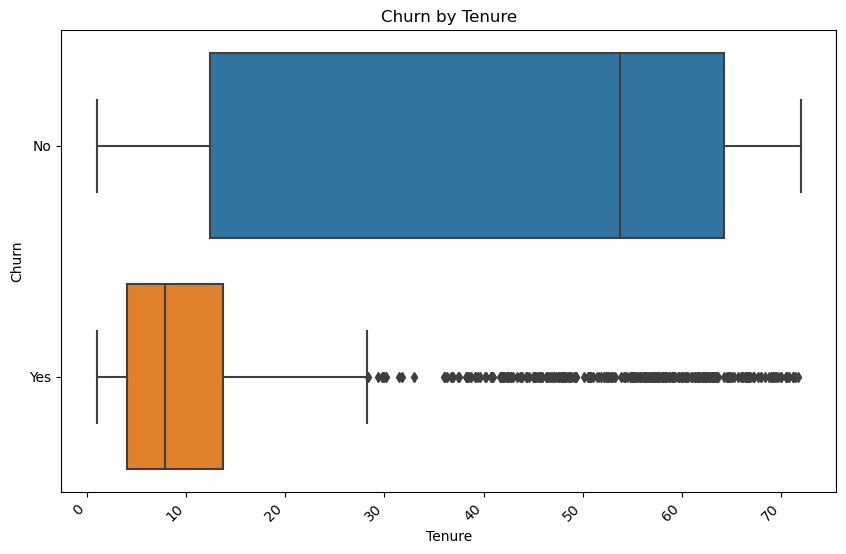


 Churn by Tenure:

       count unique  top freq
Tenure                       
1.00       1      1  Yes    1
1.01       1      1   No    1
1.02       2      2   No    1
1.03       4      2  Yes    3
1.04       2      2   No    1
...      ...    ...  ...  ...
71.96      3      1   No    3
71.97      2      1   No    2
71.98      1      1   No    1
71.99      4      1   No    4
72.00      1      1   No    1

[4266 rows x 4 columns] 



In [25]:
# Bivariate Analysis: Numerical Features vs. Churn
for num_feature in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_feature, y='Churn', data=df)
    plt.title(f'Churn by {num_feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    print(f"\n Churn by {num_feature}:\n")
    print(df.groupby(num_feature)['Churn'].describe(), "\n")
    
    
    


['No' 'Yes']


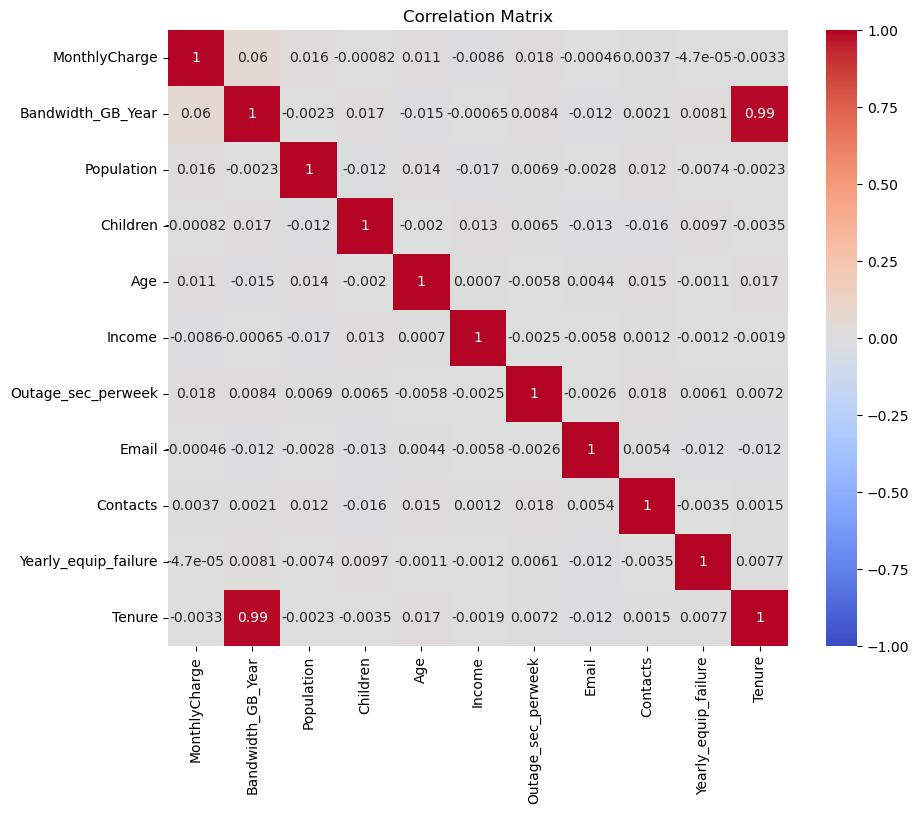

In [26]:
# Convert Churn to numeric 
## df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

# List of features
features = ['Churn', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Population', 'Children', 
            'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
            'Yearly_equip_failure', 'Tenure']

# Filter the DataFrame to include only the desired columns
df_filtered = df[features]

# Check if Churn has valid numeric values
print(df_filtered['Churn'].unique())

# Compute the correlation matrix
corr_matrix = df_filtered.corr()

# Display the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

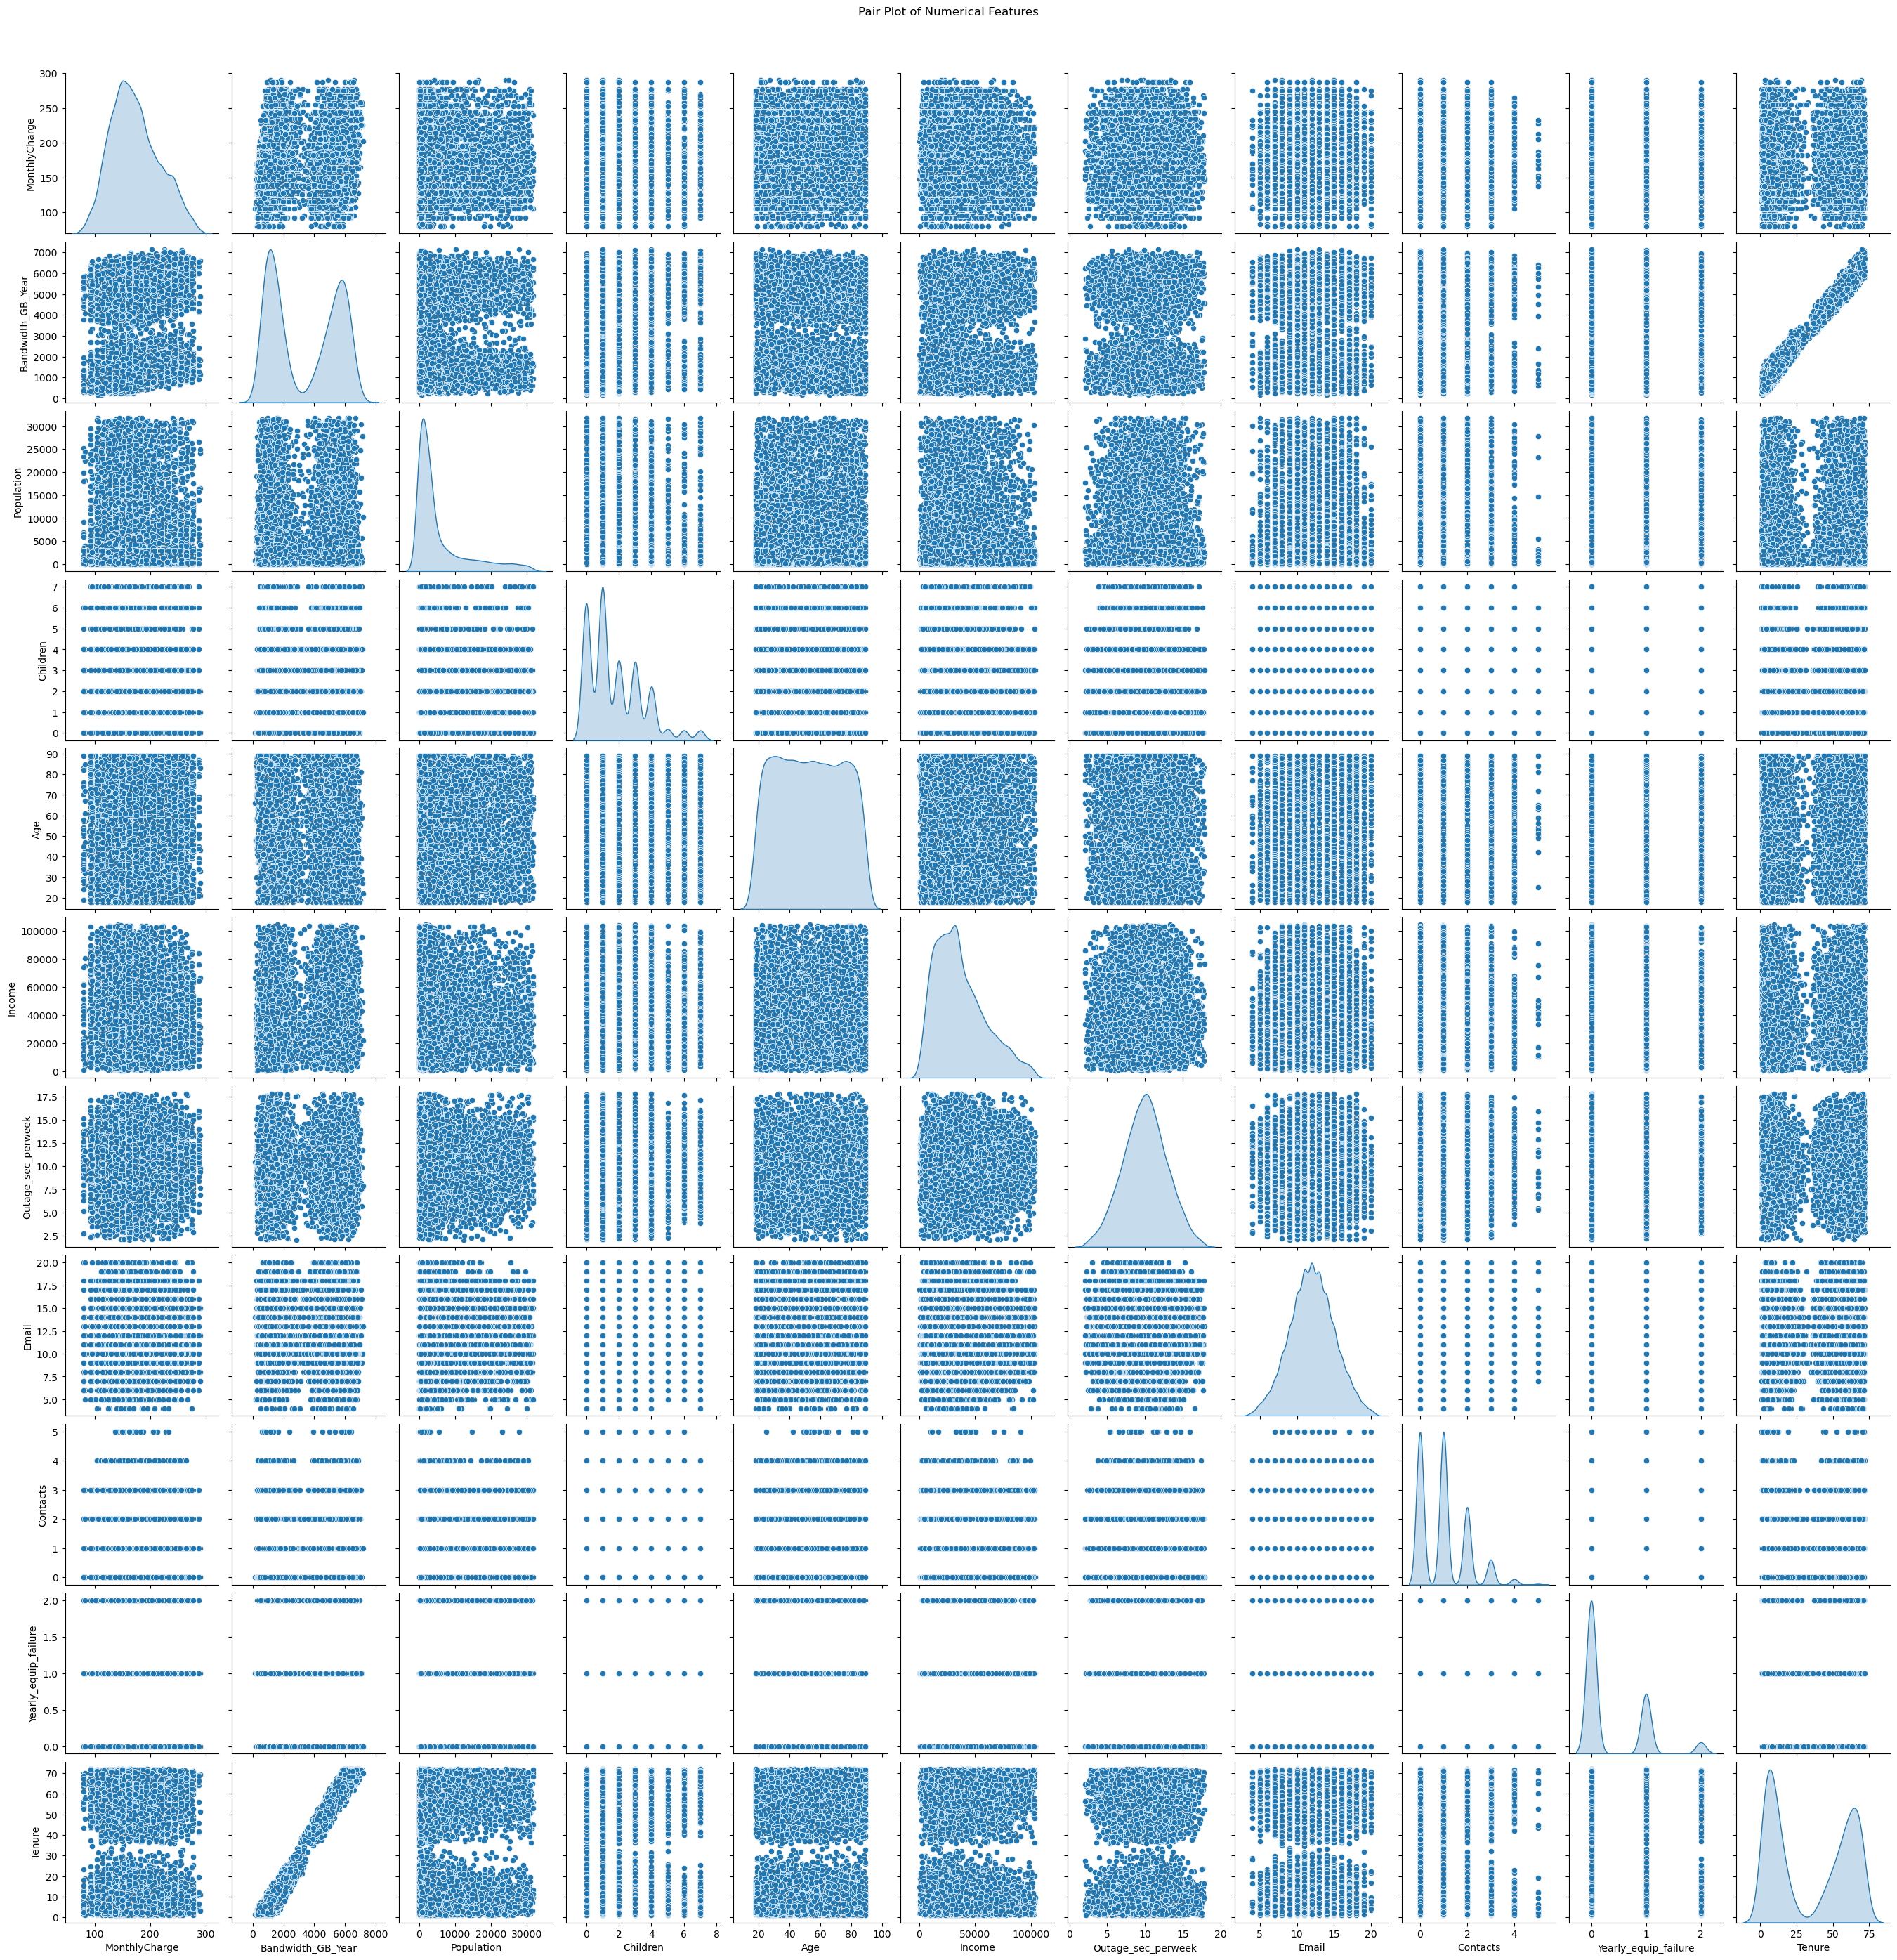

In [27]:
# Generate the pair plot
sns.pairplot(df[numerical_vars], diag_kind='kde')  
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Modeling Statistics

In [28]:
# Selecting the numerical and categorical features
numerical_features = ['MonthlyCharge', 'Bandwidth_GB_Year','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure']
categorical_features = ['Contract','InternetService','Churn']

# Create a new df with only the selected numerical and categorical features
df1 = df[numerical_features + categorical_features]


# Displaying the first few rows of the new DataFrame
print(df1.head())


   MonthlyCharge  Bandwidth_GB_Year  Population  Children   Age    Income  \
0         172.46             904.54        38.0       0.0  68.0  28561.99   
1         242.63             800.98     10446.0       1.0  27.0  21704.77   
2         159.95            2054.71      3735.0       4.0  50.0   9609.57   
3         119.96            2164.58     13863.0       1.0  48.0  18925.23   
4         149.95             271.49     11352.0       0.0  83.0  40074.19   

   Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  Tenure  \
0                7.98   10.0       0.0                   1.0    6.80   
1               11.70   12.0       0.0                   1.0    1.16   
2               10.75    9.0       0.0                   1.0   15.75   
3               14.91   15.0       2.0                   0.0   17.09   
4                8.15   16.0       2.0                   1.0    1.67   

         Contract InternetService Churn  
0        One year     Fiber Optic    No  
1  Month-to-month   

# Data Modeling 

In [29]:
# Selecting the numerical and categorical features
numerical_features = df1[['MonthlyCharge', 'Bandwidth_GB_Year','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure']]
categorical_features = df1[['Contract','InternetService']]


In [30]:
# Map 'Yes' to 1 and 'No' to 0 
df1['Churn'] = df1['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df1[['MonthlyCharge', 'Bandwidth_GB_Year', 'Population', 'Children', 'Age', 'Income', 
         'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 
         'Contract', 'InternetService']]

y = df1['Churn']

# One-hot encoding categorical features using pd.get_dummies
X_encoded = pd.get_dummies(X, columns=['Contract', 'InternetService'], drop_first=True)

# Add a constant for the intercept 
X_encoded = sm.add_constant(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the logistic regression model using statsmodels on the training set
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print Summary
print(result.summary())
# Predict on the test set
y_pred_prob = result.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Add the target variable to the DataFrame
X_encoded['Churn'] = df1['Churn'].values

# Save modeling data to a dataframe
d208_logistic_regression_modeling_data = 'd208_logistic_regression_modeling_data.csv'
X_encoded.to_csv(d208_logistic_regression_modeling_data, index=False)











Optimization terminated successfully.
         Current function value: 0.235086
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7984
Method:                           MLE   Df Model:                           15
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.5922
Time:                        13:53:46   Log-Likelihood:                -1880.7
converged:                       True   LL-Null:                       -4611.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.6850      0.378    -17.699      0.000   

In [31]:
# Create df1 from df and map 'Yes' to 1 and 'No' to 0 for the 'Churn' column
df1 = df.copy()
df1['Churn'] = df1['Churn'].map({'Yes': 1, 'No': 0})

# Check if 'Churn' column contains any unexpected values 
print(df1['Churn'].unique())
df1 = df1.dropna(subset=['Churn'])

# Separate features and target
X = df1[['MonthlyCharge', 'Bandwidth_GB_Year', 'Population', 'Children', 'Age', 'Income', 
         'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 
         'Contract', 'InternetService']]
y = df1['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables into one-hot encoded variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Add a constant (intercept) to the model
X_train_encoded = sm.add_constant(X_train_encoded)

# Define the backward elimination function
def backward_elimination(X, y, significance_level=0.05):
    while True:
        model = sm.Logit(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            print(f"Removing feature '{excluded_feature}' with p-value {max_p_value}")
            X = X.drop(columns=[excluded_feature], axis=1)
        else:
            break
    return model

# Perform backward elimination on the training data
final_model = backward_elimination(X_train_encoded, y_train)

# Display the final model summary after backward elimination
print(final_model.summary())

# Prepare the test set 
X_test_encoded = sm.add_constant(X_test_encoded)
X_test_encoded = X_test_encoded[final_model.params.index]

# Make predictions on the test set using the final model
y_pred_prob = final_model.predict(X_test_encoded)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]

# Output the final results
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

       

[0 1]
Optimization terminated successfully.
         Current function value: 0.235086
         Iterations 9
Removing feature 'Income' with p-value 0.9856552003531553
Optimization terminated successfully.
         Current function value: 0.235086
         Iterations 9
Removing feature 'Yearly_equip_failure' with p-value 0.9570011271436373
Optimization terminated successfully.
         Current function value: 0.235086
         Iterations 9
Removing feature 'InternetService_None' with p-value 0.8467786350430209
Optimization terminated successfully.
         Current function value: 0.235088
         Iterations 9
Removing feature 'Population' with p-value 0.7851319280754119
Optimization terminated successfully.
         Current function value: 0.235093
         Iterations 9
Removing feature 'Email' with p-value 0.5918273191612922
Optimization terminated successfully.
         Current function value: 0.235111
         Iterations 9
Removing feature 'Outage_sec_perweek' with p-value 0.56560295

In [32]:
# Coefficients from your logistic regression model
coefficients = {
    'MonthlyCharge': 0.0485,
    'Bandwidth_GB_Year': 0.0015,
    'Age': 0.0060,
    'Tenure': -0.2315,
    'Contract_One_Year': -3.2708,
    'Contract_Two_Year': -3.2608,
    'InternetService_Fiber_Optic': -1.5619
}

# Calculate the odds ratios by exponentiating each coefficient
odds_ratios = {variable: np.exp(coef) for variable, coef in coefficients.items()}

# Print the results
for variable, odds_ratio in odds_ratios.items():
    print(f"The odds ratio for {variable} is: {odds_ratio:.10f}")

The odds ratio for MonthlyCharge is: 1.0496953718
The odds ratio for Bandwidth_GB_Year is: 1.0015011256
The odds ratio for Age is: 1.0060180361
The odds ratio for Tenure is: 0.7933426955
The odds ratio for Contract_One_Year is: 0.0379760341
The odds ratio for Contract_Two_Year is: 0.0383576996
The odds ratio for InternetService_Fiber_Optic is: 0.2097371917


Confusion Matrix:
[[1364   92]
 [ 112  432]]


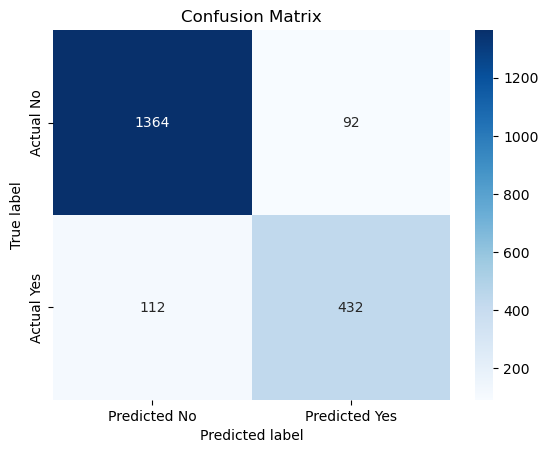

In [33]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


